## Import Libraries

In [4]:
from preprocess import preprocess, detect_lang, plot_lang_dist, plot_sentiment_dist
from tqdm import tqdm
import pandas as pd
import os
tqdm.pandas()

# Allow multiple outputs to be displayed for each cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

DATASET_DIR = '../dataset/'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# Load Dataset

In [5]:
# Load the dataset
london_train = pd.read_csv(os.path.join(DATASET_DIR, 'london_train.csv'))
london_test = pd.read_csv(os.path.join(DATASET_DIR, 'london_test.csv'))
nyc_train = pd.read_csv(os.path.join(DATASET_DIR, 'nyc_train.csv'))
nyc_test = pd.read_csv(os.path.join(DATASET_DIR, 'nyc_test.csv'))

# Concatenate the training and testing datasets for each city
london = pd.concat([london_train, london_test], ignore_index=True, axis=0)
nyc = pd.concat([nyc_train, nyc_test], ignore_index=True, axis=0)

# Select the columns of interest: comments and polarity_class
london = london[['comments', 'polarity_class']]
nyc = nyc[['comments', 'polarity_class']]

# Drop rows with missing values
london = london.dropna()
nyc = nyc.dropna()

# Detect Review Language

In [ ]:
# Detect the language of the comments
london['lang'] = london['comments'].progress_apply(detect_lang)
nyc['lang'] = nyc['comments'].progress_apply(detect_lang)

In [ ]:
# Persist to disk since this step is time-consuming
london.to_csv(os.path.join(DATASET_DIR, 'london_lang.csv'), index=False)
nyc.to_csv(os.path.join(DATASET_DIR, 'nyc_lang.csv'), index=False)

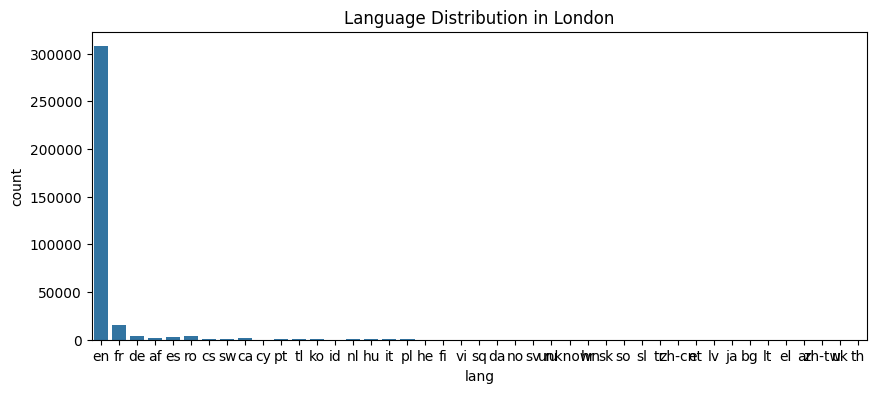

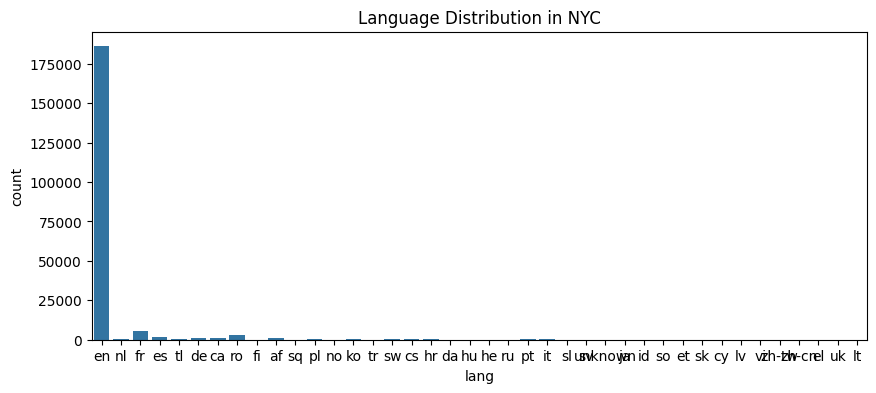

Number of reviews in English for London: 307625
Number of reviews in English for NYC: 186022


In [ ]:
# Plot distribution of languages
plot_lang_dist(london, 'London')
plot_lang_dist(nyc, 'NYC')

# Print the number of reviews in English
print("Number of reviews in English for London:", london[london['lang'] == 'en'].shape[0])
print("Number of reviews in English for NYC:", nyc[nyc['lang'] == 'en'].shape[0])

In [ ]:
# Filter out non-English reviews
london = london[london['lang'] == 'en']
nyc = nyc[nyc['lang'] == 'en']

# Preprocess Review Text

In [ ]:
# Test the preprocessing function on a sample review
sample_review = london['comments'].iloc[0]
print('Original review:', sample_review)
print('Preprocessed review:', preprocess(sample_review))

Original review: Really nice place and helpful hosts!
Preprocessed review: Really nice place helpful host


In [ ]:
# Pre-process all reviews
london['comments_preprocessed'] = london['comments'].progress_apply(preprocess)
nyc['comments_preprocessed'] = nyc['comments'].progress_apply(preprocess)
data = pd.concat([london, nyc], axis=0)

100%|██████████| 186022/186022 [00:50<00:00, 3711.87it/s]


In [ ]:
# Show samples of the preprocessed data
data.head()

,comments,polarity_class,lang,comments_preprocessed
0,Really nice place and helpful hosts!,1.0,en,Really nice place helpful host
1,"The apartment is near to the city centre, the ...",1.0,en,apartment near city centre tube 10 minute far ...
2,Helena's apartment is simply stunning. She was...,1.0,en,Helenas apartment simply stunning incredibly w...
5,everything was perfect!,1.0,en,everything perfect
6,Elaine is a great host and she provides a clea...,1.0,en,Elaine great host provides clean comfortable w...


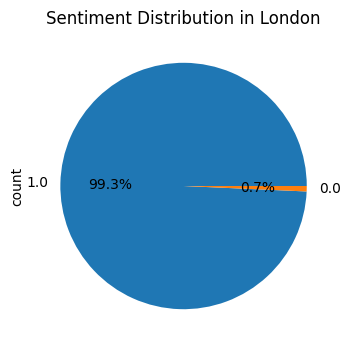

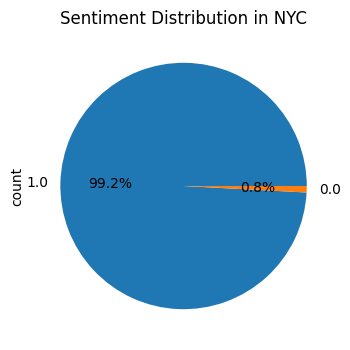

In [ ]:
# Show piechart of sentiment distribution in the dataset
plot_sentiment_dist(london, 'London')
plot_sentiment_dist(nyc, 'NYC')

In [ ]:
# Save the preprocessed datasets to disk
london.to_csv(os.path.join(DATASET_DIR, 'london_preprocessed.csv'), index=False)
nyc.to_csv(os.path.join(DATASET_DIR, 'nyc_preprocessed.csv'), index=False)